In [12]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
#set mean and covariance
means = [1,-2,4]
cov_matrix = np.matrix([[0.6113,0.3416,0.3854],[0.3416,0.4955,0.1194],[0.3854,0.1194,0.3048]])

In [3]:
#take sample and split up marginal distributions
mn = multivariate_normal(mean=means, cov=cov_matrix)
sample = mn.rvs(size=1000)
x = sample[:,0]
y = sample[:,1]
z = sample[:,2]

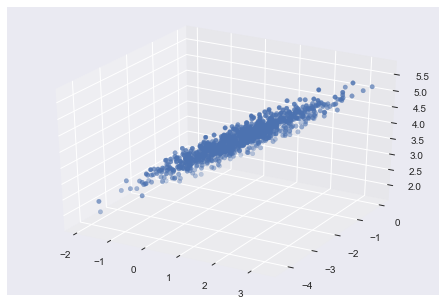

In [5]:
#make a 3s plot
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x, y, z)
pyplot.show()

In [7]:
#print out mean value
mean_val = np.mean(sample, axis=0)
print("The mean vector of the sample is:", mean_val)

The mean vector of the sample is: [ 0.91429412 -2.03013975  3.9357429 ]


In [8]:
#print out covariance vector
sample_trans = np.transpose(sample)
cov_mat = np.cov(sample_trans)
print("The covariance of the sample is:", cov_mat)

The covariance of the sample is: [[ 0.64904673  0.36040366  0.41688108]
 [ 0.36040366  0.51040983  0.13662864]
 [ 0.41688108  0.13662864  0.32705167]]


In [24]:
#write numerical integration function
def mc_integrate(func, upper, lower, n):
    #find the maximum y value on the X interval 0 to 10
    X=np.linspace(lower,upper,1000)
    y2=max((func(X)))+0.000001
    #generate x and y values on our grid
    x_val = np.random.uniform(lower,upper,n)
    y_val = np.random.uniform(0,y2,n)
    #throw darts at out area of interest and calculate what proportion are below the curve
    count = []
    for i in range(len(y_val)):
        if y_val[i] < func(x_val[i]):
            count.append(1)
        else:
            count.append(0)
    #multiply our are by the proportion of darts below the curve to find our integral
    integral = (np.mean(count))*(upper-lower)*y2
    return(integral)

In [30]:
#write the function for integration
std = np.sqrt(0.6113)
def E_x2(x):
    v = norm.pdf(x, loc=1, scale=std)*(x**2)
    return(v)

In [38]:
mc_integrate(E_x2,4,-2,100000)

1.6038939663876774